- 가중치가 늘어나면서 공식으로 해결하기에 한계가 있음
- 오차를 최소화하는 방향으로 접근 -> 경사하강법
- 경사하강법도 값을 줄이는 방향으로 접근할 수는 있음 -> tensorflow
- 단항만 있을 때는 최소제곱법을 사용했음

## 오차역전파의 개념

- 출력값을 통해서 가중치와 바이어스를 조정한다.
- 오차를 뒤에서 앞으로 보내면서 수정한다.


### TF를 사용하여 코딩으로 확인하는 XOR 문제 - 2layer_5W
- hidden layer를 늘리거나, node의 수를 늘리면?
- hidden layer 의 node를 5개로 늘리기

In [1]:
import tensorflow as tf
import numpy as np

learning_rate= 0.1

# 매번 동일한 결과가 나오기 위함.
tf.set_random_seed(0)
np.random.seed(0)

# XOR
x_data = [[0,0],[0,1],[1,0],[1,1]]
y_data= [[0],[1],[1],[0]]


X = tf.placeholder(tf.float32, [None,2])
Y = tf.placeholder(tf.float32, [None,1])

# [2,2]????
W1 = tf.Variable(tf.random_normal([2,5]),name ='weight1')

b1 = tf.Variable(tf.random_normal([5]), name = 'bias1')

# Hidden layer
layer1 = tf.sigmoid(tf.matmul(X,W1) + b1)

W2 = tf.Variable(tf.random_normal([5,1]), name = 'weight2')

b2 = tf.Variable(tf.random_normal([1]), name = 'bias2')   
                 
hypothesis = tf.sigmoid(tf.matmul(layer1, W2) + b2)

# 비용함수
# 학습
cost = -tf.reduce_mean(Y * tf.log(hypothesis) + (1-Y) * tf.log(1-hypothesis))
train = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

# keras에서는 자동화되는 부분
predicted = tf.cast(hypothesis > 0.5, dtype = tf.float32)
accuracy = tf.reduce_mean(tf.cast(tf.equal(predicted, Y), dtype=tf.float32))


with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    
    for step in range(10001):
        sess.run(train, feed_dict={X:x_data,Y:y_data})
        
        if step % 100 ==0:
            print(step, sess.run(cost, feed_dict = {X:x_data, Y:y_data}), sess.run(W2))

    h,c,a = sess.run([hypothesis, predicted, accuracy],feed_dict={X:x_data, Y:y_data})
    print('\nHypothesis: \n',h,'\nCorrect: \n',c,'\Accuracy: \n',a)


0 1.1449463 [[-0.9081275]
 [ 0.0646946]
 [-0.7740026]
 [ 1.5253712]
 [ 3.1045496]]
100 0.75609976 [[-1.0662147 ]
 [-0.01588965]
 [-1.1875186 ]
 [ 0.9563629 ]
 [ 2.2478724 ]]
200 0.71901906 [[-1.0726349 ]
 [ 0.02852233]
 [-1.2122022 ]
 [ 0.9462824 ]
 [ 1.8550439 ]]
300 0.70334756 [[-1.0794697 ]
 [ 0.06478019]
 [-1.2476113 ]
 [ 0.94846326]
 [ 1.6200831 ]]
400 0.69529027 [[-1.086406  ]
 [ 0.09347778]
 [-1.2838323 ]
 [ 0.95281   ]
 [ 1.4805143 ]]
500 0.6899619 [[-1.0951226 ]
 [ 0.11604306]
 [-1.3175819 ]
 [ 0.9559098 ]
 [ 1.4019705 ]]
600 0.68554986 [[-1.1075592 ]
 [ 0.13380454]
 [-1.348801  ]
 [ 0.9570102 ]
 [ 1.3656944 ]]
700 0.68125284 [[-1.1255698 ]
 [ 0.14784299]
 [-1.3786745 ]
 [ 0.9564013 ]
 [ 1.3608059 ]]
800 0.6766217 [[-1.1510235 ]
 [ 0.15899184]
 [-1.4088329 ]
 [ 0.9546963 ]
 [ 1.3805182 ]]
900 0.6713252 [[-1.1859572 ]
 [ 0.16787362]
 [-1.4410614 ]
 [ 0.9525486 ]
 [ 1.4203469 ]]
1000 0.6650505 [[-1.2326944 ]
 [ 0.17493725]
 [-1.4772047 ]
 [ 0.95055264]
 [ 1.4772526 ]]
1100 0.657

9200 0.013001347 [[-10.162101  ]
 [ -0.30789062]
 [ -4.9652276 ]
 [  2.7137792 ]
 [  8.244718  ]]
9300 0.0127969645 [[-10.190499  ]
 [ -0.31058306]
 [ -4.976184  ]
 [  2.7224538 ]
 [  8.265836  ]]
9400 0.012598645 [[-10.218488 ]
 [ -0.3132423]
 [ -4.9869814]
 [  2.7310147]
 [  8.286641 ]]
9500 0.012406189 [[-10.246079  ]
 [ -0.31586918]
 [ -4.997623  ]
 [  2.7394655 ]
 [  8.307135  ]]
9600 0.012219214 [[-10.273288  ]
 [ -0.31846458]
 [ -5.0081115 ]
 [  2.7478087 ]
 [  8.327332  ]]
9700 0.012037655 [[-10.30012   ]
 [ -0.32102928]
 [ -5.0184517 ]
 [  2.7560472 ]
 [  8.3472395 ]]
9800 0.011861132 [[-10.326586  ]
 [ -0.32356396]
 [ -5.0286484 ]
 [  2.764183  ]
 [  8.366864  ]]
9900 0.011689507 [[-10.352695  ]
 [ -0.32606944]
 [ -5.038705  ]
 [  2.7722192 ]
 [  8.386217  ]]
10000 0.011522656 [[-10.378464 ]
 [ -0.3285465]
 [ -5.048624 ]
 [  2.7801583]
 [  8.405297 ]]

Hypothesis: 
 [[0.01180607]
 [0.99512553]
 [0.98264325]
 [0.01174921]] 
Correct: 
 [[0.]
 [1.]
 [1.]
 [0.]] \Accuracy: 
 1.0


### layer를 4개로
- 2단과 4단 layer로 각각 학습된 모델의 예측값을 비교한 결과 4단 layer로 예측한 값이 더 정확한 것을 확인할 수 있다.


In [5]:
import tensorflow as tf
import numpy as np

learning_rate= 0.1

# 매번 동일한 결과가 나오기 위함.
tf.set_random_seed(0)
np.random.seed(0)

# XOR
x_data = [[0,0],[0,1],[1,0],[1,1]]
y_data= [[0],[1],[1],[0]]


X = tf.placeholder(tf.float32, [None,2])
Y = tf.placeholder(tf.float32, [None,1])

# [2,2]????
W1 = tf.Variable(tf.random_normal([2,5]),name ='weight1')
b1 = tf.Variable(tf.random_normal([5]), name = 'bias1')
# Hidden layer
layer1 = tf.sigmoid(tf.matmul(X,W1) + b1)



W2 = tf.Variable(tf.random_normal([5,5]), name = 'weight2')
b2 = tf.Variable(tf.random_normal([5]), name = 'bias2') 
layer2 = tf.sigmoid(tf.matmul(layer1,W2) + b2)


W3= tf.Variable(tf.random_normal([5,5]), name = 'weight3')
b3= tf.Variable(tf.random_normal([5]), name = 'bias3') 
layer3= tf.sigmoid(tf.matmul(layer2,W3) + b3)



W4= tf.Variable(tf.random_normal([5,1]), name = 'weight4')
b4 = tf.Variable(tf.random_normal([1]), name = 'bias4')                  
hypothesis = tf.sigmoid(tf.matmul(layer3, W4) + b4)


# 비용함수
# 학습
cost = -tf.reduce_mean(Y * tf.log(hypothesis) + (1-Y) * tf.log(1-hypothesis))
train = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

# keras에서는 자동화되는 부분
predicted = tf.cast(hypothesis > 0.5, dtype = tf.float32)
accuracy = tf.reduce_mean(tf.cast(tf.equal(predicted, Y), dtype=tf.float32))


with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    
    for step in range(10001):
        sess.run(train, feed_dict={X:x_data,Y:y_data})
        
        if step % 100 ==0:
            print(step, sess.run(cost, feed_dict = {X:x_data, Y:y_data}), sess.run(W2))

    h,c,a = sess.run([hypothesis, predicted, accuracy],feed_dict={X:x_data, Y:y_data})
    print('\nHypothesis: \n',h,'\nCorrect: \n',c,'\Accuracy: \n',a)


0 0.779137 [[-0.8983195   0.01364418 -0.30816016  2.2145462   1.261912  ]
 [-1.5620406   1.2277832  -0.48985702  1.0544313  -0.05875735]
 [ 0.8468993  -0.45910275  1.0218298  -0.6491388  -1.9668967 ]
 [ 0.7451907   0.24090546 -1.2365793  -0.17161378  0.7837302 ]
 [ 1.8553447   1.634874    1.6217806  -1.4986626   1.1618198 ]]
100 0.6902685 [[-0.9058719   0.0290978  -0.29646534  2.2069333   1.2771798 ]
 [-1.5783825   1.2587401  -0.47084153  1.0421982  -0.03068803]
 [ 0.84051913 -0.43928164  1.0386605  -0.65684307 -1.9448712 ]
 [ 0.739886    0.25475335 -1.2265887  -0.17768303  0.8036353 ]
 [ 1.8509305   1.6444596   1.6310467  -1.5038266   1.1674548 ]]
200 0.6896938 [[-0.90769774  0.02840587 -0.2987086   2.2062528   1.2810026 ]
 [-1.5886712   1.271255   -0.4680593   1.0383254  -0.01618084]
 [ 0.8380793  -0.42991877  1.0472931  -0.6602735  -1.9310136 ]
 [ 0.7415005   0.24999018 -1.2322824  -0.17618091  0.80989957]
 [ 1.8480886   1.6492196   1.6362427  -1.5067544   1.1697901 ]]
300 0.6890733

2500 0.5318419 [[-0.9454093  -0.10706614 -0.4207218   2.1451826   1.3613918 ]
 [-2.266124    2.074099    0.07990983  0.62749237  0.45935786]
 [ 0.8443943   0.13940246  1.3893918  -0.9051611  -1.6848878 ]
 [ 1.0309967  -0.17299818 -1.9436628  -0.01179213  0.862821  ]
 [ 1.5123796   1.904522    2.4970155  -1.9067572   1.257886  ]]
2600 0.48805696 [[-0.9485597  -0.12904792 -0.38348314  2.1218908   1.3725    ]
 [-2.3516023   2.1582005   0.23838943  0.5472075   0.49706674]
 [ 0.8157963   0.2974348   1.5590752  -1.000962   -1.6584847 ]
 [ 1.0585474  -0.21844645 -1.9291791  -0.03145133  0.87609744]
 [ 1.4869782   1.9130425   2.5664804  -1.9366628   1.2584121 ]]
2700 0.41334394 [[-0.9497333  -0.1834631  -0.33928853  2.0973969   1.3829638 ]
 [-2.4433048   2.2130132   0.44211185  0.45054603  0.53232044]
 [ 0.77249473  0.49454734  1.8486317  -1.1450973  -1.6296273 ]
 [ 1.0891774  -0.3069882  -1.8825626  -0.06016717  0.8901805 ]
 [ 1.4604177   1.9301524   2.6253097  -1.9669608   1.2588383 ]]
2800 

5500 0.0072110016 [[-0.9051738  -0.7566501  -0.72225416  2.2329564   1.3905611 ]
 [-2.9354181   2.33888     1.2045957  -0.00486362  0.552926  ]
 [ 0.44720182  2.0836656   3.7884939  -2.1579056  -1.6201175 ]
 [ 1.3768982  -1.089392   -2.4794197   0.21791142  0.89634705]
 [ 1.2106317   2.482224    3.2398448  -2.400605    1.2581192 ]]
5600 0.0069001988 [[-0.9045448  -0.7599573  -0.7252848   2.234579    1.390418  ]
 [-2.9377499   2.3400152   1.2081883  -0.0072404   0.5521961 ]
 [ 0.44484043  2.0937865   3.7989273  -2.1634438  -1.6210278 ]
 [ 1.3791614  -1.0936972  -2.4842856   0.22170685  0.8959748 ]
 [ 1.208933    2.4871128   3.24456    -2.4045467   1.2580477 ]]
5700 0.006613793 [[-0.90393794 -0.76311815 -0.7281824   2.2361307   1.3902817 ]
 [-2.9399712   2.341102    1.2116145  -0.00952078  0.5514884 ]
 [ 0.44257626  2.1034641   3.808893   -2.1687424  -1.6219116 ]
 [ 1.3813323  -1.0978163  -2.488939    0.22535513  0.89561385]
 [ 1.2073076   2.4918015   3.2490735  -2.4083364   1.2579762 ]]

8200 0.0031786666 [[-0.8932021  -0.8147412  -0.7755698   2.2616153   1.387822  ]
 [-2.9753091   2.3592918   1.2665877  -0.04813057  0.5384709 ]
 [ 0.40463856  2.2619288   3.97069    -2.256053   -1.6382995 ]
 [ 1.4179083  -1.1656868  -2.5653322   0.28784046  0.8889039 ]
 [ 1.1805408   2.5705557   3.3236628  -2.4733162   1.2567166 ]]
8300 0.003112195 [[-0.89288586 -0.816152   -0.776866    2.2623112   1.3877505 ]
 [-2.9762492   2.3597977   1.2680652  -0.0492264   0.5380755 ]
 [ 0.4035766   2.26627     3.9750848  -2.2584631  -1.6388001 ]
 [ 1.4189392  -1.1675599  -2.5674295   0.2896266   0.88869876]
 [ 1.1798049   2.572765    3.3257225  -2.4751773   1.2566808 ]]
8400 0.0030483592 [[-0.89257544 -0.81753165 -0.77813363  2.2629964   1.387679  ]
 [-2.9771674   2.3602984   1.2695085  -0.05030046  0.5376867 ]
 [ 0.40253675  2.270516    3.9793818  -2.2608218  -1.6392924 ]
 [ 1.4199483  -1.169392   -2.5694811   0.29137748  0.8884961 ]
 [ 1.179084    2.5749283   3.3277373  -2.4770014   1.2566451 ]]

### 기울기 소실 문제와 활성화 함수
- 다중 퍼셉트로닝 오차역전파를 만나 신경망이 됨.
- 신경망으로 XOR문제 해결
- 기울기소실문제 발생!
- 오차역전파는 뒤에서 앞으로 가면서 가중치를 수정하는 방법
- 가중치를 수정하려면 미분값 즉 기울기가 필요하다.
- 기울기 자체가 가중치랑 바이어스가 아니고, 연산을 통해서 미분이기 때문에 미분을 해서 0으로 줄어들게 되는 것이다. 수정을 하는 것이 아니라, 미분을 해서 줄어드는 것이다. 오차역전파로 값을 수정하게 되면, 기울기 소실문제가 발생하게 되는 것이다.

### layer 10개로 수정

In [14]:

learning_rate= 0.1

# 매번 동일한 결과가 나오기 위함.
tf.set_random_seed(0)
np.random.seed(0)

# XOR
x_data = [[0,0],[0,1],[1,0],[1,1]]
y_data= [[0],[1],[1],[0]]


X = tf.placeholder(tf.float32, [None,2])
Y = tf.placeholder(tf.float32, [None,1])

# layer 10개 생성
W1 = tf.Variable(tf.random_normal([2,5]),name ='weight1')
b1 = tf.Variable(tf.random_normal([5]), name = 'bias1')
# Hidden layer
layer1 = tf.sigmoid(tf.matmul(X,W1) + b1)



W2 = tf.Variable(tf.random_normal([5,5]), name = 'weight2')
b2 = tf.Variable(tf.random_normal([5]), name = 'bias2') 
layer2 = tf.sigmoid(tf.matmul(layer1,W2) + b2)


W3= tf.Variable(tf.random_normal([5,5]), name = 'weight3')
b3= tf.Variable(tf.random_normal([5]), name = 'bias3') 
layer3= tf.sigmoid(tf.matmul(layer2,W3) + b3)



W4 = tf.Variable(tf.random_normal([5,5]), name = 'weight4')
b4 = tf.Variable(tf.random_normal([5]), name = 'bias4')
layer4 = tf.sigmoid(tf.matmul(layer3,W4) + b4)



W5= tf.Variable(tf.random_normal([5,5]), name = 'weight5')
b5 = tf.Variable(tf.random_normal([5]), name = 'bias5')
layer5 = tf.sigmoid(tf.matmul(layer4,W5) + b5)



W6= tf.Variable(tf.random_normal([5,5]), name = 'weight6')
b6 = tf.Variable(tf.random_normal([5]), name = 'bias6')
layer6 = tf.sigmoid(tf.matmul(layer5,W6) + b6)


W7 = tf.Variable(tf.random_normal([5,5]), name = 'weight7')
b7= tf.Variable(tf.random_normal([5]), name = 'bias7')
layer7= tf.sigmoid(tf.matmul(layer6,W7) + b7)


                    
W8= tf.Variable(tf.random_normal([5,5]), name = 'weight8')
b8= tf.Variable(tf.random_normal([5]), name = 'bias8')
layer8= tf.sigmoid(tf.matmul(layer7,W8) + b8)

                    
W9= tf.Variable(tf.random_normal([5,5]), name = 'weight9')
b9= tf.Variable(tf.random_normal([5]), name = 'bias9')
layer9= tf.sigmoid(tf.matmul(layer8,W9) + b9)



W10= tf.Variable(tf.random_normal([5,1]), name = 'weight10')
b10 = tf.Variable(tf.random_normal([1]), name = 'bias10')
hypothesis = tf.sigmoid(tf.matmul(layer9, W10) + b10)


# 비용함수
# 학습
cost = -tf.reduce_mean(Y * tf.log(hypothesis) + (1-Y) * tf.log(1-hypothesis))
train = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

# keras에서는 자동화되는 부분
predicted = tf.cast(hypothesis > 0.5, dtype = tf.float32)
accuracy = tf.reduce_mean(tf.cast(tf.equal(predicted, Y), dtype=tf.float32))


with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    
    for step in range(10001):
        sess.run(train, feed_dict={X:x_data,Y:y_data})
        
        if step % 100 ==0:
            print(step, sess.run(cost, feed_dict = {X:x_data, Y:y_data}), sess.run(W10))

    h,c,a = sess.run([hypothesis, predicted, accuracy],feed_dict={X:x_data, Y:y_data})
    print('\nHypothesis: \n',h,'\nCorrect: \n',c,'\nAccuracy: \n',a)


0 0.8226992 [[-0.6473608 ]
 [ 0.3673617 ]
 [ 0.49942318]
 [-1.4314035 ]
 [-0.9537111 ]]
100 0.69314694 [[-0.366525  ]
 [ 0.6404138 ]
 [ 0.69015354]
 [-1.3996283 ]
 [-0.86790216]]
200 0.69314694 [[-0.36650306]
 [ 0.6404347 ]
 [ 0.69016975]
 [-1.3996265 ]
 [-0.8678961 ]]
300 0.69314694 [[-0.36650306]
 [ 0.6404347 ]
 [ 0.69016993]
 [-1.3996265 ]
 [-0.8678961 ]]
400 0.69314694 [[-0.36650306]
 [ 0.6404347 ]
 [ 0.69016993]
 [-1.3996265 ]
 [-0.8678961 ]]
500 0.69314694 [[-0.366503  ]
 [ 0.6404347 ]
 [ 0.69017005]
 [-1.3996265 ]
 [-0.8678961 ]]
600 0.69314694 [[-0.366503  ]
 [ 0.6404347 ]
 [ 0.69017005]
 [-1.3996265 ]
 [-0.8678961 ]]
700 0.693147 [[-0.366503  ]
 [ 0.6404347 ]
 [ 0.69017017]
 [-1.3996265 ]
 [-0.8678961 ]]
800 0.69314694 [[-0.366503  ]
 [ 0.6404347 ]
 [ 0.69017017]
 [-1.3996265 ]
 [-0.8678961 ]]
900 0.693147 [[-0.366503 ]
 [ 0.6404347]
 [ 0.6901703]
 [-1.3996265]
 [-0.8678961]]
1000 0.69314694 [[-0.366503 ]
 [ 0.6404347]
 [ 0.6901703]
 [-1.3996265]
 [-0.8678961]]
1100 0.693147 [

9300 0.693147 [[-0.36650002]
 [ 0.6404347 ]
 [ 0.69017327]
 [-1.3996265 ]
 [-0.8678961 ]]
9400 0.69314694 [[-0.36649996]
 [ 0.6404347 ]
 [ 0.69017327]
 [-1.3996265 ]
 [-0.8678961 ]]
9500 0.693147 [[-0.36649987]
 [ 0.6404347 ]
 [ 0.69017327]
 [-1.3996265 ]
 [-0.8678961 ]]
9600 0.693147 [[-0.36649984]
 [ 0.6404347 ]
 [ 0.6901734 ]
 [-1.3996265 ]
 [-0.8678961 ]]
9700 0.69314694 [[-0.36649984]
 [ 0.6404347 ]
 [ 0.6901735 ]
 [-1.3996265 ]
 [-0.8678961 ]]
9800 0.69314694 [[-0.36649984]
 [ 0.6404347 ]
 [ 0.6901735 ]
 [-1.3996265 ]
 [-0.8678961 ]]
9900 0.69314694 [[-0.36649984]
 [ 0.6404347 ]
 [ 0.6901736 ]
 [-1.3996265 ]
 [-0.8678961 ]]
10000 0.693147 [[-0.36649984]
 [ 0.6404347 ]
 [ 0.69017375]
 [-1.3996265 ]
 [-0.8678961 ]]

Hypothesis: 
 [[0.4999986 ]
 [0.5000027 ]
 [0.49999726]
 [0.500001  ]] 
Correct: 
 [[0.]
 [1.]
 [0.]
 [1.]] 
Accuracy: 
 0.5


- layer가 늘어날 수록 값이 좋아지는 것만은 아님
- Accuray 1.0 -> 0.75
- 가중치를 앞단으로 보내주면, 기울기는 앞으로 갈 수록 미분해야하니까, 기울기의 값이 소실되어 버리기 때문이다.
- (과적합과는 다른 문제)
- 가중치와 바이어스는 depplearning이 끝나면 상수가 된다.
- deep learning 사이의 모든 node와 layer사이에 있는 가중치와 바이어스 정보가 deep learning이 끝나면 모델에 저장이 된다.
- 값들이 sigmoid함수를 지나게 되면서 그 값이 1보다 작게 되며 경우에 따라서는 굉장히 0 에 가까운 값들이 계속 곱해지게 되며, 결국에는 매우 작은 값을 갖게 된다.
- 결과 단에서 점점 멀어질 수록 결과값의 영향을 찾기 힘들다.
- 이 전에는 기울기에 따라서 가중치와 바이어스를 수정했다.
- 층을 거쳐 갈수록 기울기가 사라져 가중치를 수정하기가 어려워진다.

### ReLU활성화함수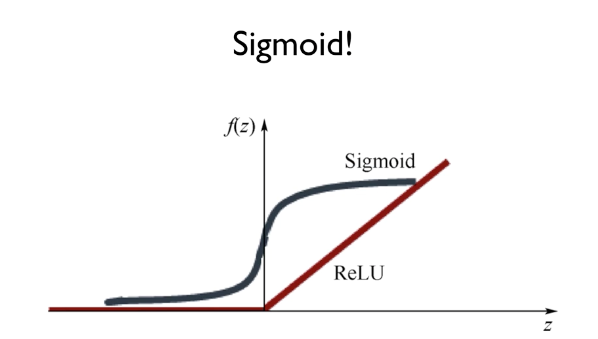

- 입력값이 0보다 작을 때는 아예 non-activate로 꺼버리고, 0보다 클 때에는 그 값을 그대로 반환한다.
- relu x가 0 보다 작을 때는f(x) = 0, x가 0보다 클 때는 f(x) = x값이 된다.
- 즉, x가 0보다 작으면 0이 되며, 그렇지 않으면 값에 비례하여 계속 증가한다.
- tf.nn.relu()
- 시그모이드함수는 0과1사이이고, 미분하면 계속해서 값이 작아졌지만, relu 함수는 그렇지 않음.
- tf.nn.relu(tf.matmul(X,W1) + b1)
- relu함수를 사용하면 기울기 소실문제가 해결되고 정밀도가 올라간다.

In [30]:
learning_rate= 0.1

# 매번 동일한 결과가 나오기 위함.
tf.set_random_seed(0)
np.random.seed(0)

# XOR
x_data = [[0,0],[0,1],[1,0],[1,1]]
y_data= [[0],[1],[1],[0]]


X = tf.placeholder(tf.float32, [None,2])
Y = tf.placeholder(tf.float32, [None,1])

# layer 10개 생성
# W1 = 2,5행렬의 실수형의 랜덤데이터를 생성하고 tensorflow 변수로 지정
W1 = tf.Variable(tf.random_normal([2,5]),name ='weight1')
b1 = tf.Variable(tf.random_normal([5]), name = 'bias1')
# Hidden layer
layer1 = tf.nn.relu(tf.matmul(X,W1) + b1)


# tf.random_normal[ , ] 안에 만들고 싶은 실수형 랜덤 행렬크기 지정

W2 = tf.Variable(tf.random_normal([5,5]), name = 'weight2')
b2 = tf.Variable(tf.random_normal([5]), name = 'bias2') 
layer2 = tf.nn.relu(tf.matmul(layer1,W2) + b2)


W3= tf.Variable(tf.random_normal([5,5]), name = 'weight3')
b3= tf.Variable(tf.random_normal([5]), name = 'bias3') 
layer3= tf.nn.relu(tf.matmul(layer2,W3) + b3)



W4 = tf.Variable(tf.random_normal([5,5]), name = 'weight4')
b4 = tf.Variable(tf.random_normal([5]), name = 'bias4')
layer4 = tf.nn.relu(tf.matmul(layer3,W4) + b4)



W5= tf.Variable(tf.random_normal([5,5]), name = 'weight5')
b5 = tf.Variable(tf.random_normal([5]), name = 'bias5')
layer5 = tf.nn.relu(tf.matmul(layer4,W5) + b5)



W6= tf.Variable(tf.random_normal([5,5]), name = 'weight6')
b6 = tf.Variable(tf.random_normal([5]), name = 'bias6')
layer6 = tf.nn.relu(tf.matmul(layer5,W6) + b6)


W7 = tf.Variable(tf.random_normal([5,5]), name = 'weight7')
b7= tf.Variable(tf.random_normal([5]), name = 'bias7')
layer7= tf.nn.relu(tf.matmul(layer6,W7) + b7)


                    
W8= tf.Variable(tf.random_normal([5,5]), name = 'weight8')
b8= tf.Variable(tf.random_normal([5]), name = 'bias8')
layer8= tf.nn.relu(tf.matmul(layer7,W8) + b8)

                    
W9= tf.Variable(tf.random_normal([5,5]), name = 'weight9')
b9= tf.Variable(tf.random_normal([5]), name = 'bias9')
layer9= tf.nn.relu(tf.matmul(layer8,W9) + b9)



W10= tf.Variable(tf.random_normal([5,1]), name = 'weight10')
b10 = tf.Variable(tf.random_normal([1]), name = 'bias10')


# 은닉층의 표현은 0과1의 표현이 목적이 아니기 떄문에 은닉층은 relu함수를 
# 사용하고 마지막 함수는  0과 1로 표현되어야 하므로 sigmoid함수를 사용해야한다.
# 가설을 시그모이드 함수로 정의한다.
# hypothesis -> 예측값 f(x)
# hypothesis값이 1에 가까워질 수록 정밀도가 높아진다.
hypothesis = tf.sigmoid(tf.matmul(layer9, W10) + b10)


# 비용함수
# 학습
cost = -tf.reduce_mean(Y * tf.log(hypothesis) + (1-Y) * tf.log(1-hypothesis))
train = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

# keras에서는 자동화되는 부분
predicted = tf.cast(hypothesis > 0.5, dtype = tf.float32)
accuracy = tf.reduce_mean(tf.cast(tf.equal(predicted, Y), dtype=tf.float32))


with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    
    for step in range(10001):
        sess.run(train, feed_dict={X:x_data,Y:y_data})
        
        if step % 1000 ==0:
            print(step, sess.run(cost, feed_dict = {X:x_data, Y:y_data}), sess.run(W10))

    h,c,a = sess.run([hypothesis, predicted, accuracy],feed_dict={X:x_data, Y:y_data})
    print('\nHypothesis: \n',h,'\nCorrect: \n',c,'\nAccuracy: \n',a)


0 1.0454541 [[-1.1502094 ]
 [ 0.8898595 ]
 [-0.5969966 ]
 [-1.0111458 ]
 [-0.05979101]]
1000 0.6931472 [[-1.03411   ]
 [ 0.8898595 ]
 [-0.5969966 ]
 [-0.8948424 ]
 [-0.04443863]]
2000 0.6931472 [[-1.03411   ]
 [ 0.8898595 ]
 [-0.5969966 ]
 [-0.8948424 ]
 [-0.04443863]]
3000 0.6931472 [[-1.03411   ]
 [ 0.8898595 ]
 [-0.5969966 ]
 [-0.8948424 ]
 [-0.04443863]]
4000 0.6931472 [[-1.03411   ]
 [ 0.8898595 ]
 [-0.5969966 ]
 [-0.8948424 ]
 [-0.04443863]]
5000 0.6931472 [[-1.03411   ]
 [ 0.8898595 ]
 [-0.5969966 ]
 [-0.8948424 ]
 [-0.04443863]]
6000 0.6931472 [[-1.03411   ]
 [ 0.8898595 ]
 [-0.5969966 ]
 [-0.8948424 ]
 [-0.04443863]]
7000 0.6931472 [[-1.03411   ]
 [ 0.8898595 ]
 [-0.5969966 ]
 [-0.8948424 ]
 [-0.04443863]]
8000 0.6931472 [[-1.03411   ]
 [ 0.8898595 ]
 [-0.5969966 ]
 [-0.8948424 ]
 [-0.04443863]]
9000 0.6931472 [[-1.03411   ]
 [ 0.8898595 ]
 [-0.5969966 ]
 [-0.8948424 ]
 [-0.04443863]]
10000 0.6931472 [[-1.03411   ]
 [ 0.8898595 ]
 [-0.5969966 ]
 [-0.8948424 ]
 [-0.04443863]]



- 경사하강법은 정확도는 높지만 전체 데이터를 미분해야하므로, 계산량이 매우 많은 것이 단점이다.
- ???확률적 경사 하강법이란???
- 전체 데이터를 사용하는 것이 아니라, 랜덤하게 추출한 일부 데이터를 사용한다.


## 모델 설계하기

### 폐암 수술 환자의 생존율 예측

In [10]:
import tensorflow as tf
import numpy as np

learning_rate = 0.1

tf.set_random_seed(0)
np.random.seed(0)

data = np.loadtxt('C:/Users/user/study1/머신러닝/data/ThoraricSurgery.csv',delimiter = ',')

x_data = data[:,0:17]
y_data = data[:,[17]]


X = tf.placeholder(tf.float32, shape = [None,17])  
Y = tf.placeholder(tf.float32, shape = [None,1])


W1 = tf.Variable(tf.random_normal([17,30]), name = 'weight1')
b1 = tf.Variable(tf.random_normal([30]), name = 'bias1')
layer1 = tf.sigmoid(tf.matmul(X,W1) + b1)

W2 = tf.Variable(tf.random_normal([30,1]), name = 'weight2')
b2 = tf.Variable(tf.random_normal([1]), name = 'bias2')
hypothesis = tf.sigmoid(tf.matmul(layer1,W2) + b2)


# 비용함수
# 학습
cost = -tf.reduce_mean(Y * tf.log(hypothesis) + (1-Y) * tf.log(1-hypothesis))
train = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

# keras에서는 자동화되는 부분
predicted = tf.cast(hypothesis > 0.5, dtype = tf.float32)
accuracy = tf.reduce_mean(tf.cast(tf.equal(predicted, Y), dtype=tf.float32))


with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    
    for step in range(10001):
        cost_val, train_val = sess.run([cost, train], feed_dict = {X:x_data,Y:y_data})
        
        if step % 1000 ==0:
            print(step, cost_val)

    h,c,a = sess.run([hypothesis, predicted, accuracy],feed_dict = {X:x_data, Y:y_data})
    print('\nHypothesis: \n',h,'\nCorrect: \n',c,'\nAccuracy: \n',a)




0 3.1017323
1000 0.40788132
2000 0.4049002
3000 0.4029537
4000 0.4012808
5000 0.39909306
6000 0.39723632
7000 0.3957359
8000 0.39374912
9000 0.3923945
10000 0.3909165

Hypothesis: 
 [[0.17842683]
 [0.02645257]
 [0.6961466 ]
 [0.63268197]
 [0.03241095]
 [0.0379985 ]
 [0.13861647]
 [0.20362881]
 [0.20544288]
 [0.0758073 ]
 [0.07388499]
 [0.19133025]
 [0.07061884]
 [0.09486476]
 [0.24600935]
 [0.07060027]
 [0.09133568]
 [0.09651864]
 [0.1185492 ]
 [0.07068428]
 [0.17155614]
 [0.16993791]
 [0.08209056]
 [0.16556302]
 [0.11969703]
 [0.17725572]
 [0.17657375]
 [0.17769942]
 [0.17750853]
 [0.1780935 ]
 [0.17840812]
 [0.17842683]
 [0.17842698]
 [0.10720164]
 [0.17842418]
 [0.03010854]
 [0.17841756]
 [0.17842698]
 [0.09770879]
 [0.13521248]
 [0.11580837]
 [0.09770668]
 [0.10286069]
 [0.09770668]
 [0.09770674]
 [0.09770668]
 [0.09770668]
 [0.09771547]
 [0.09770668]
 [0.09770668]
 [0.09770668]
 [0.09811768]
 [0.09770668]
 [0.03568724]
 [0.04740304]
 [0.11951527]
 [0.84535   ]
 [0.10212287]
 [0.60